Q-Forecast Airlines Passengers data set. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.

In [134]:
!pip install category_encoders

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import category_encoders as ce
import statsmodels.formula.api as smf

from numpy import log

In [136]:
dataset=pd.read_excel("E:\DATA SCIENCE\LMS\ASSIGNMENT\MY ASSIGNMENT\Forcasting\Airlines+Data.xlsx")
print(dataset)

        Month  Passengers
0  1995-01-01         112
1  1995-02-01         118
2  1995-03-01         132
3  1995-04-01         129
4  1995-05-01         121
..        ...         ...
91 2002-08-01         405
92 2002-09-01         355
93 2002-10-01         306
94 2002-11-01         271
95 2002-12-01         306

[96 rows x 2 columns]


In [137]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


From the plot below, we can see that there is a Trend compoenent in th series. Hence, we now check for stationarity of the data

In [138]:
dataset.rename(columns = {"Month": "date"}, inplace = True)
dataset

,date,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [139]:
print(dataset.shape)
dataset.isnull().sum()

(96, 2)


date          0
Passengers    0
dtype: int64

In [140]:
ds=dataset

In [141]:
ds.describe(include='all')

,date,Passengers
count,96,96.000000
unique,96,NaN
top,1995-01-01 00:00:00,NaN
freq,1,NaN
first,1995-01-01 00:00:00,NaN
last,2002-12-01 00:00:00,NaN
mean,NaN,213.708333
std,NaN,71.918216
min,NaN,104.000000
25%,NaN,156.000000


In [142]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


<AxesSubplot:>

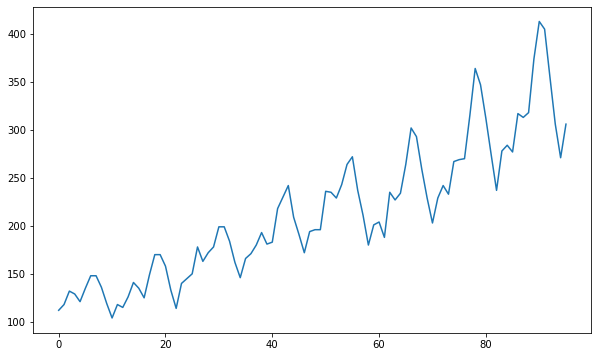

In [143]:
ds.Passengers.plot()
# the data has an exponential curve with multiplicative seasonality

In [144]:
ds_air = ds.copy()
ds_air.head(5)

,date,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [175]:
t_list = [x for x in range(1,len(ds)+1)]
ds_air['t'] = t_list

ds_air['t_square'] = ds_air['t']*ds_air['t']

#log transformation
ds_air['log_passengers'] = np.log10(ds.Passengers)
ds_air.head(15)

,date,Passengers,t,t_square,log_passengers,months,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1995-01-01,112,1,1,2.049218,Jan,1995,1,0,0,0,0,0,0,0,0,0,0,0
1,1995-02-01,118,2,4,2.071882,Feb,1995,0,1,0,0,0,0,0,0,0,0,0,0
2,1995-03-01,132,3,9,2.120574,Mar,1995,0,0,1,0,0,0,0,0,0,0,0,0
3,1995-04-01,129,4,16,2.110590,Apr,1995,0,0,0,1,0,0,0,0,0,0,0,0
4,1995-05-01,121,5,25,2.082785,May,1995,0,0,0,0,1,0,0,0,0,0,0,0
5,1995-06-01,135,6,36,2.130334,Jun,1995,0,0,0,0,0,1,0,0,0,0,0,0
6,1995-07-01,148,7,49,2.170262,Jul,1995,0,0,0,0,0,0,1,0,0,0,0,0
7,1995-08-01,148,8,64,2.170262,Aug,1995,0,0,0,0,0,0,0,1,0,0,0,0
8,1995-09-01,136,9,81,2.133539,Sep,1995,0,0,0,0,0,0,0,0,1,0,0,0
9,1995-10-01,119,10,100,2.075547,Oct,1995,0,0,0,0,0,0,0,0,0,1,0,0


In [176]:
ds_air['months'] = ds['date'].dt.month_name() # saves months name from date
ds_air['months'] = [x[0:3] for x in ds_air.months] # will take only first 3 chars of months like jan,feb
ds_air['year']   = ds['date'].dt.year
ds_air

,date,Passengers,t,t_square,log_passengers,months,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1995-01-01,112,1,1,2.049218,Jan,1995,1,0,0,0,0,0,0,0,0,0,0,0
1,1995-02-01,118,2,4,2.071882,Feb,1995,0,1,0,0,0,0,0,0,0,0,0,0
2,1995-03-01,132,3,9,2.120574,Mar,1995,0,0,1,0,0,0,0,0,0,0,0,0
3,1995-04-01,129,4,16,2.110590,Apr,1995,0,0,0,1,0,0,0,0,0,0,0,0
4,1995-05-01,121,5,25,2.082785,May,1995,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,92,8464,2.607455,Aug,2002,0,0,0,0,0,0,0,1,0,0,0,0
92,2002-09-01,355,93,8649,2.550228,Sep,2002,0,0,0,0,0,0,0,0,1,0,0,0
93,2002-10-01,306,94,8836,2.485721,Oct,2002,0,0,0,0,0,0,0,0,0,1,0,0
94,2002-11-01,271,95,9025,2.432969,Nov,2002,0,0,0,0,0,0,0,0,0,0,1,0


In [177]:
dummy = pd.DataFrame(pd.get_dummies(ds_air['months']))
dummy

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,1,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,1
93,0,0,0,0,0,0,0,0,0,0,1,0
94,0,0,0,0,0,0,0,0,0,1,0,0


In [178]:
colsequence = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
dummy = dummy.reindex(columns=colsequence ) #sorts the column headings

ds_air = pd.concat([ds_air,dummy], axis=1)
ds_air

,date,Passengers,t,t_square,log_passengers,months,year,Jan,Feb,Mar,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1995-01-01,112,1,1,2.049218,Jan,1995,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1995-02-01,118,2,4,2.071882,Feb,1995,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1995-03-01,132,3,9,2.120574,Mar,1995,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,1995-04-01,129,4,16,2.110590,Apr,1995,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1995-05-01,121,5,25,2.082785,May,1995,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,92,8464,2.607455,Aug,2002,0,0,0,...,0,0,0,0,0,1,0,0,0,0
92,2002-09-01,355,93,8649,2.550228,Sep,2002,0,0,0,...,0,0,0,0,0,0,1,0,0,0
93,2002-10-01,306,94,8836,2.485721,Oct,2002,0,0,0,...,0,0,0,0,0,0,0,1,0,0
94,2002-11-01,271,95,9025,2.432969,Nov,2002,0,0,0,...,0,0,0,0,0,0,0,0,1,0


<AxesSubplot:xlabel='months', ylabel='year'>

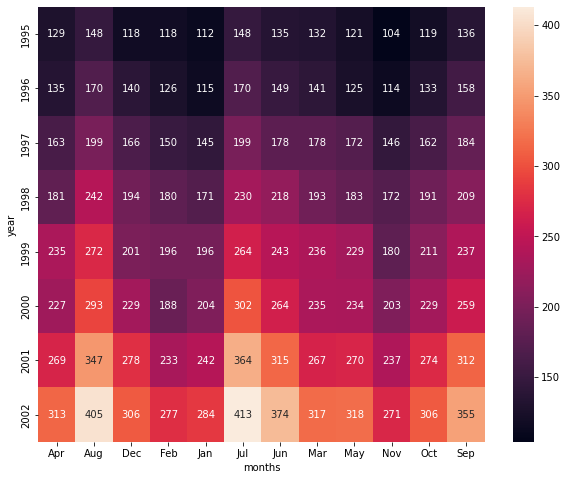

In [179]:
heatmap_passengers = pd.pivot_table(data=ds_air,values='Passengers',index='year',
                                    columns='months',aggfunc='mean',fill_value=0)
plt.figure(figsize=(10,8))
sns.heatmap(data =heatmap_passengers , annot=True,fmt='g')

<AxesSubplot:xlabel='year', ylabel='Passengers'>

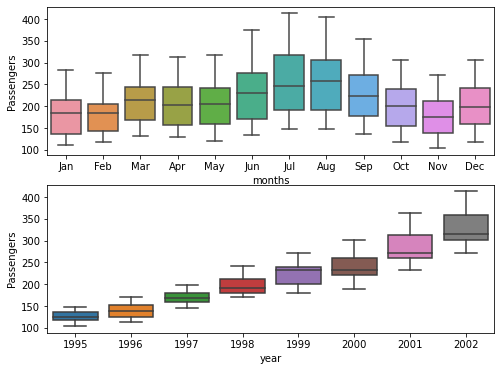

In [180]:
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x='months', y='Passengers', data=ds_air)
plt.subplot(212)
sns.boxplot(x='year', y='Passengers', data=ds_air)

<AxesSubplot:xlabel='year', ylabel='Passengers'>

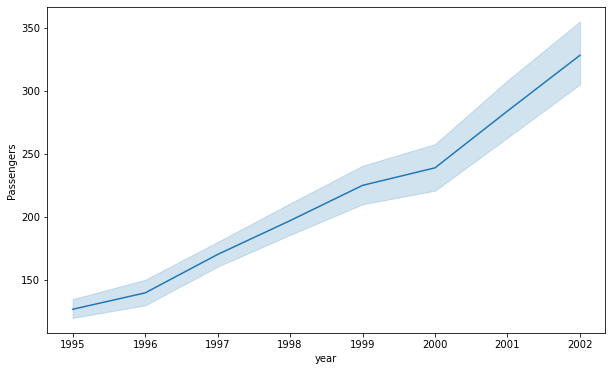

In [181]:
sns.lineplot(x='year',y='Passengers',data=ds_air)

<AxesSubplot:xlabel='months', ylabel='Passengers'>

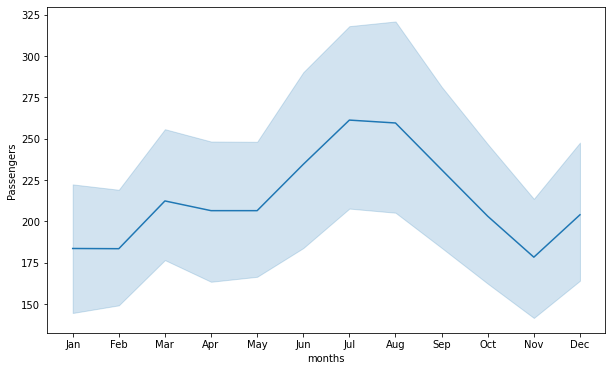

In [182]:
sns.lineplot(x='months',y='Passengers',data=ds_air)

In [183]:
x_train = ds_air.head(76)
x_test  = ds_air.tail(20)
print(x_train.shape)
print(x_test.shape)

(76, 31)
(20, 31)


In [184]:
x_test

,date,Passengers,t,t_square,log_passengers,months,year,Jan,Feb,Mar,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
76,2001-05-01,270,77,5929,2.431364,May,2001,0,0,0,...,0,0,1,0,0,0,0,0,0,0
77,2001-06-01,315,78,6084,2.498311,Jun,2001,0,0,0,...,0,0,0,1,0,0,0,0,0,0
78,2001-07-01,364,79,6241,2.561101,Jul,2001,0,0,0,...,0,0,0,0,1,0,0,0,0,0
79,2001-08-01,347,80,6400,2.540329,Aug,2001,0,0,0,...,0,0,0,0,0,1,0,0,0,0
80,2001-09-01,312,81,6561,2.494155,Sep,2001,0,0,0,...,0,0,0,0,0,0,1,0,0,0
81,2001-10-01,274,82,6724,2.437751,Oct,2001,0,0,0,...,0,0,0,0,0,0,0,1,0,0
82,2001-11-01,237,83,6889,2.374748,Nov,2001,0,0,0,...,0,0,0,0,0,0,0,0,1,0
83,2001-12-01,278,84,7056,2.444045,Dec,2001,0,0,0,...,0,0,0,0,0,0,0,0,0,1
84,2002-01-01,284,85,7225,2.453318,Jan,2002,1,0,0,...,0,0,0,0,0,0,0,0,0,0
85,2002-02-01,277,86,7396,2.442480,Feb,2002,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [185]:
le_model         = smf.ols('Passengers~t',data=x_train).fit()
predicted_linear = pd.Series(le_model.predict(pd.DataFrame(x_test['t'])))
rmse_linear      = np.sqrt(np.mean(np.array(x_test['Passengers'])-np.array(predicted_linear))**2)
rmse_linear      = round(rmse_linear,2)
rmse_linear

36.02

In [186]:
#Exponential

Exp      = smf.ols('log_passengers~t',data=x_train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(x_test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(x_test['log_passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp = round(rmse_Exp,2)
rmse_Exp

9.48

In [187]:
#Quadratic 

Quad = smf.ols('Passengers~t+t_square',data=x_train).fit()
pred_Quad = pd.Series(Quad.predict(x_test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(x_test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad = round(rmse_Quad,2)
rmse_Quad

58.49

In [188]:
#Additive seasonality 

add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=x_train).fit()
pred_add_sea = pd.Series(add_sea.predict(x_test[['Jan','Feb','Mar','Apr','May','Jun','Jul',
                                               'Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(x_test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea = round(rmse_add_sea,2)
rmse_add_sea

132.25

In [189]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',
                       data=x_train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(x_test[['Jan','Feb','Mar','Apr','May','Jun','Jul',
                                               'Aug','Sep','Oct','Nov','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(x_test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

39.759766338096874

In [190]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',
                  data = x_train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(x_test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(x_test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea = round(rmse_Mult_sea,2)
rmse_Mult_sea

310.55

In [191]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',
                      data = x_train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(x_test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(x_test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea = round(rmse_Mult_add_sea,2)
rmse_Mult_add_sea

308.05

In [192]:
#comparing the results
model_list                = ["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea",
                                 "rmse_Mult_add_sea"]
rmse_val_list             = [rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,
                                 rmse_Mult_add_sea]

table_rmse                = pd.DataFrame(columns=['Model','RMSE Values'])
table_rmse['Model']       = model_list
table_rmse['RMSE Values'] = rmse_val_list

table_rmse.sort_values(by=['RMSE Values'])

,Model,RMSE Values
1,rmse_Exp,9.480000
0,rmse_linear,36.020000
4,rmse_add_sea_quad,39.759766
2,rmse_Quad,58.490000
3,rmse_add_sea,132.250000
6,rmse_Mult_add_sea,308.050000
5,rmse_Mult_sea,310.550000


In [193]:
new_data = ds_air.tail(12)
new_data

,date,Passengers,t,t_square,log_passengers,months,year,Jan,Feb,Mar,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
84,2002-01-01,284,85,7225,2.453318,Jan,2002,1,0,0,...,0,0,0,0,0,0,0,0,0,0
85,2002-02-01,277,86,7396,2.442480,Feb,2002,0,1,0,...,0,0,0,0,0,0,0,0,0,0
86,2002-03-01,317,87,7569,2.501059,Mar,2002,0,0,1,...,1,0,0,0,0,0,0,0,0,0
87,2002-04-01,313,88,7744,2.495544,Apr,2002,0,0,0,...,0,1,0,0,0,0,0,0,0,0
88,2002-05-01,318,89,7921,2.502427,May,2002,0,0,0,...,0,0,1,0,0,0,0,0,0,0
89,2002-06-01,374,90,8100,2.572872,Jun,2002,0,0,0,...,0,0,0,1,0,0,0,0,0,0
90,2002-07-01,413,91,8281,2.615950,Jul,2002,0,0,0,...,0,0,0,0,1,0,0,0,0,0
91,2002-08-01,405,92,8464,2.607455,Aug,2002,0,0,0,...,0,0,0,0,0,1,0,0,0,0
92,2002-09-01,355,93,8649,2.550228,Sep,2002,0,0,0,...,0,0,0,0,0,0,1,0,0,0
93,2002-10-01,306,94,8836,2.485721,Oct,2002,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [194]:
new_data = new_data.drop(columns=['Passengers','log_passengers','year'])

In [195]:
#picked the model with the lowest RMSE value
#training the model on the entire dataset with rmse_Mult_add_sea
model_full = smf.ols('log_passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',
                      data = ds_air).fit()

In [196]:
predicted_new = model_full.predict(new_data)
predicted_new

84    2.447697
85    2.452268
86    2.514450
87    2.500182
88    2.497349
89    2.551133
90    2.597279
91    2.596360
92    2.548484
93    2.491977
94    2.435323
95    2.494624
dtype: float64

In [197]:
new_data['forecasted_passengers'] = predicted_new
new_data

,date,t,t_square,months,Jan,Feb,Mar,Apr,May,Jun,...,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,forecasted_passengers
84,2002-01-01,85,7225,Jan,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.447697
85,2002-02-01,86,7396,Feb,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.452268
86,2002-03-01,87,7569,Mar,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2.514450
87,2002-04-01,88,7744,Apr,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,2.500182
88,2002-05-01,89,7921,May,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,2.497349
89,2002-06-01,90,8100,Jun,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,2.551133
90,2002-07-01,91,8281,Jul,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,2.597279
91,2002-08-01,92,8464,Aug,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2.596360
92,2002-09-01,93,8649,Sep,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2.548484
93,2002-10-01,94,8836,Oct,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2.491977


NameError: name 'new_data' is not defined

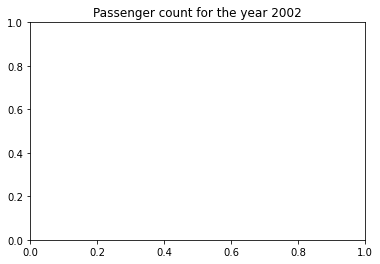

In [2]:
plt.title('Passenger count for the year 2002')
sns.lineplot(x='months',y='forecasted_passengers',data=new_data)

In [199]:
y=(new_data['forecasted_passengers'])

In [200]:
y

84    2.447697
85    2.452268
86    2.514450
87    2.500182
88    2.497349
89    2.551133
90    2.597279
91    2.596360
92    2.548484
93    2.491977
94    2.435323
95    2.494624
Name: forecasted_passengers, dtype: float64

In [203]:
# back to our anitilog values for kmow numbers of passagers
z=(10**y)

In [204]:
z

84    280.347839
85    283.313952
86    326.926267
87    316.360477
88    314.303607
89    355.740518
90    395.620652
91    394.784174
92    353.576683
93    310.439400
94    272.472660
95    312.337712
Name: forecasted_passengers, dtype: float64